# Assignment 1

This programming assignment has several sections for each part you should fill out the the jupyter notebook.  Make sure to save your work by downloading the file or using the browser save. 


You will submit the work to MMS by uploading your .ipynb file. 



# Function syntax



1) Write a function that finds the 2nd largest number.  E.g. out of 1, 2, 3, 4, 5  it's 4.   In the code block below 

In [37]:
#replace the elpisis (...) with code to find the 2nd largest number from a list.
#you can use multiple lines
listOfNumbers  = [ 1, 10, 80, 99, 100]

def secondLargest(list):
    list.sort(reverse=True)
    return list[1]

print(secondLargest(listOfNumbers))

99


2. Write a funtion that generlizes the above function to finds the nth largest number from a list.  It should  take 2 argmuments, 1) a list of numbers, and 2) a number indicating which value to select (e.g. 3rd or 4th largest)

In [39]:
#Function that generalises the above function to find the nth largest number
# from a list 
# Takes two arguments 
def nthLargest(list, n):
    list.sort(reverse=True)
    return list[n-1]
# Example using list of numbers and asking for the 3rd largest number
print(nthLargest(listOfNumbers,3))

80


In [45]:
#Above function modified to add an interactive input to choose an nth term
#Using list of numbers as an example
def nthLargest(list, n):
    list.sort(reverse=True)
    return list[n-1]
n = int(input("Enter nth term:"))
if n == 1:
    nth = 'st'
elif n== 2:
    nth = 'nd'
else: 
    nth = 'th'
result = nthLargest(listOfNumbers, n)
print("The " + str(n) + (nth) + " largest number is " + str(result))

Enter nth term: 5


The 5th largest number is 1


# Titanic 

The datafile "titanic.csv" contains real data from the sinking of the titanic.    For this excercise you will load this data and calcluate some values.   

The data is in the file: titantic.csv

Analyze the datasets to produce the following outputs.  For each section you need to do:

a) code to generate the output
b) description of your code.  This should be written inline with the code using a # comment line
```
#Divide cases by the population to get per capita rate and multipy by 100,000 to get cases per 100k
result = 100,000*(cases/population)
```
c) markdown cell that explains what the output shows and how you interpret this output. 



1) Prepare basic descriptives of the dataset by finding the answers to the following:  How many passengers are in the dataset?  How many survived? 
2)  The common saying is "women and children first".   Looking at all the passengers can you determine if women and children we more likely to survive than adult men?
3)  The next task is to breakdown into more specific categories.  In the dataset is also the ticket class of the passenger. First calculate the survival rate for the different classes.  Then repeat task (2) splitting for women and children, but now do it seperately for the different ticket classes.  What can you say about the results?


In [ ]:
#This code block checks if file exists and downloads data if not. 
import os

if not os.path.isfile("titanic.csv"):
  !wget https://github.com/j-ales/PS4106_2021-22/raw/master/assignment1/titanic.csv


In [47]:
### Setup 
import pandas as pd
titanic = pd.read_csv("titanic.csv")
## View data to get an idea of the dataset to be worked with 
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [61]:
### Task 1 - Basic descriptives 
## How many passengers are in the dataset?
# Find number of passengers by finding the length of the dataset 
passengers = len(titanic)
print("Number of passengers is " + str(passengers))

## How many survived?
# Calculate number of survivors by calling all rows where survived == 1 
# The 1 denotes a survivor, where a 0 in this column denotes a loss 
survivors = titanic.query("Survived == 1")
print(str(survivors['Name'].count()) + " passengers survived")



Number of passengers is 887
342 passengers survived


### The basic descriptives of the Titanic dataset 
The output shows the number of passengers in the dataset to be 887. 
Next, it shows that 342 passengers survived. 
It can interpreted that a large amount of passengers were lost. This could be further described with a survival rate calculation.



In [78]:
### Task 2 - Determining if women and children were more likely to survive
### than adult men 
## To detemined this - will have to split dataset into two groups 
## Group 1 - Men & Group 2 - Women and Children

# First creating a dataframe to contain men 
#- adults are defined as passengers aged 18 and older 
# querying for all males aged 18 and older 
men = titanic.query("Sex == 'male' and Age >= 18.0") 

# querying for survivors in the men dataset 
men_survivors = men.query("Survived == 1")

# calculating percentage of men who survived - ie survival rate 
# -> dividing survivors by total men to get percentage who survived 
men_survivalrate = 100*(len(men_survivors))/(len(men))
print(str(men_survivalrate) + "% of men who survived")

# Next consider the women and children 
# Creating a dataframe for women 
# Querying for all females aged 18 and older 
women = titanic.query("Sex == 'female' and Age >= 18.0")

# querying for survivors in the women dataset 
women_survivors = women.query("Survived == 1")

# calculating women survivors with the same method used for men
women_survivalrate = 100*(len(women_survivors))/(len(women))
print(str(women_survivalrate) + "% of women who survived")

#Creating a dataframe for children 
#Querying for any passenger under age 18 
children = titanic.query("Age <= 18.0")

# querying for survivors in the children dataset 
children_survivors = children.query("Survived == 1")

# calculating children survivors with the same method used for men
children_survivalrate = 100*(len(children_survivors))/(len(children))
print(str(children_survivalrate) + "% of children who survived")


16.600790513833992% of men who survived
76.89243027888446% of women who survived
46.98795180722892% of children who survived


### Were women and children more likely to survive than men?
The output tell us that the survival rate for men was 16.61%, that for women was 76.90% and that for children was 46.99%. 
Overall, we can interpret this as men were less likely to survive than women and children. 
Women were the most likely to survive.

In [85]:
### Task 3 - Breaking down into more species categories  
### Part A - First calculate the survival rate for the different classes. 

## Survival rate for first class 
# Subsetting based on class - first 
class1 = titanic.query("Pclass == 1")
# Calling for survived passengers within this 1st class dataset
survivedclass1 = class1.query("Survived == 1")
# Calculating survival rate by dividing survived by total number of people in 
#first class
class1survival = 100*(len(survivedclass1)/len(class1))
print(str(class1survival) + "% of First class survived")

## Survival rate for second class 
# Use same method as was used for first class
class2 = titanic.query("Pclass == 2")
survivedclass2 = class2.query("Survived == 1")
class2survival = 100*(len(survivedclass2)/len(class2))
print(str(class2survival) + "% of Second class survived")

## Survival rate for third class 
# Use same method as was used for first class
class3 = titanic.query("Pclass == 3")
survivedclass3 = class3.query("Survived == 1")
class3survival = 100*(len(survivedclass3)/len(class3))
print(str(class3survival) + "% of Third class survived")

### Part B - Then repeat task 1 splitting for women and children,
###but now do it seperately for the different ticket classes.
##First class
print("Considering passengers travelling in First class:")
# Splitting the class dataframes down into men 
men1 = class1.query("Sex == 'male' and Age >= 18.0")
# Subsetting for survived men 
survivedmen1 = men1.query("Survived == 1")
# Calculating survival rate using same method as previously 
men1survival = 100*(len(survivedmen1)/len(men1))
print(str(men1survival) + "% of First class men survived")

# Using same method as above for women and children in first class
women1 = class1.query("Sex == 'female' and Age >= 18.0")
survivedw1 = women1.query("Survived == 1")
children1 = class1.query(" Age < 18.0")
survivedc1 = children1.query("Survived == 1")

#Combing women and children data together 
total1WandC = len(women1)+len(children1)
survived1WandC = len(survivedw1)+len(survivedc1)
WandC1survival = 100*(survived1WandC/total1WandC)
print(str(WandC1survival) + "% of First class women and children survived")

##Then repeating this method for next two classes 
##Second class 
print("Considering passengers travelling in Second class:")
men2 = class2.query("Sex == 'male' and Age >= 18.0")
survivedmen2 = men2.query("Survived == 1")
men2survival = 100*(len(survivedmen2)/len(men2))
print(str(men2survival) + "% of Second class men survived")

women2 = class2.query("Sex == 'female' and Age >= 18.0")
survivedw2 = women2.query("Survived == 1")
children2 = class2.query(" Age < 18.0")
survivedc2 = children2.query("Survived == 1")

total2WandC = len(women2)+len(children2)
survived2WandC = len(survivedw2)+len(survivedc2)
WandC2survival = 100*(survived2WandC/total2WandC)
print(str(WandC2survival) + "% of Second class women and children survived")

##Third class 
print("Considering passengers travelling in Third class:")
men3 = class3.query("Sex == 'male' and Age >= 18.0")
survivedmen3 = men3.query("Survived == 1")
men3survival = 100*(len(survivedmen3)/len(men3))
print(str(men3survival) + "% of Third class men survived")

women3 = class3.query("Sex == 'female' and Age >= 18.0")
survivedw3 = women2.query("Survived == 1")
children3 = class3.query(" Age < 18.0")
survivedc3 = children2.query("Survived == 1")

total3WandC = len(women3)+len(children3)
survived3WandC = len(survivedw3)+len(survivedc3)
WandC3survival = 100*(survived3WandC/total3WandC)
print(str(WandC3survival) + "% of Third class women and children survived")

62.96296296296296% of First class survived
47.28260869565217% of Second class survived
24.435318275154007% of Third class survived
Considering passengers travelling in First class:
34.74576271186441% of First class men survived
96.93877551020408% of First class women and children survived
Considering passengers travelling in Second class:
8.24742268041237% of Second class men survived
90.80459770114942% of Second class women and children survived
Considering passengers travelling in Third class:
12.027491408934708% of Third class men survived
40.30612244897959% of Third class women and children survived


### Further breaking down the titanic dataset 
**Comparing survival rates by passenger class**

The output shows that 62.96% of passengers in First class survived; 47.28% of passengers in Second Class survived; and 24.44% of passengers in Third Class survived. 
First class passengers had a higher survival rate than both of the other passenger classes. 

**Comparing survival rates of women and children and men by passenger class**

The output shows us that - 

Considering passengers travelling in First class:

34.75% of First class men survived

96.94% of First class women and children survived

Considering passengers travelling in Second class:

8.25% of Second class men survived

90.80% of Second class women and children survived

Considering passengers travelling in Third class:

12.027% of Third class men survived

40.31% of Third class women and children survived

Across each class, women and children had a higher survival rate compared to men. 
Women and children travelling in First class were most likely to survive compared to women and children in other passenger classes. 
However, the survival rate of women and children in Third class was almost half that of the survival rate of women and children in First and Second class. 
Additionally, men travelling in second class had the lowest rate of survival. 

# Covid in Scotland

This section is a mini real world data analysis.  There is lots of open data available from various sources. In this excercise I want you to take real public data about COVID cases in Scotland and combine it with demographic information. 

## Covid Data
The COVID data comes from Public Health Scotland: https://www.publichealthscotland.scot/our-areas-of-work/covid-19/covid-19-data-and-intelligence/covid-19-daily-cases-in-scotland-dashboard/overview-of-the-daily-covid-19-data-dashboard/

The COVID data is the file: scotland_covid_by_IZ.csv

The covid data includes (among others) the following columns that you should find useful:

| Column Name| Description|
|-----------|-------------|
| Date| Data string YYYYMMDD|
|IntZone|The ID code for the intermediate zone the data comes from|
|IntZoneName| The name for the zone|
|CA| Code indentifying the council area|
|CAName| Council name|
|Positive7Day|  Number of postive days in the preceding 7 days|
|Population| Population of intermediate zone, based on the latest population estimate figures.|
|Days from 2020-03-01| Number of days from March 1st, 2020, use for plotting|


 
 
## Demographic Data
The demographic data about student populations comes from the Scotland 2011 census table #QS102SC. I preprocessed the raw data to provide an easier analysis for this assignment.   The census data is given in terms of "Data Zones" which are small areas of about 500-1000 people.  But because COVID status is potentially sensitive information in order to protect privacy COVID data is released at the "Intermediate Zone" (IZ) level.  These are groups of about about 5 data zones.  So you need to aggregagate the demographic datazones into intermediate zone level to be able to combine the demographic information with the covid dataset.  I have done this for you already.

The student population data is in the file: studentPop_by_IZ.csv

The Scottish Index of Multiple Deprivation (SIMD) is the method Scotland uses to quantify Socie-Economic Status of local areas of scotland. More information can be found from the the Scottish Government website [link](https://www.gov.scot/collections/scottish-index-of-multiple-deprivation-2020/).  
Commonly SIMD is grouped into 5 "quintiles" from 1(most deprived) to 5 (least deprived). There is no direct equivalent for intermediate zones. There are various ways to quantify the SIMD of the intermediate zones (IZ).  I've provided a a version for you that looks at the population within an IZ and classifies it by the SIMD quintile of the majority of the  population. 

The SIMD data is in the file: scotland_simd_by_IZ.csv








# There are 4 parts to prepare for this part of the assignment 

1) A table of the top 10 Scottish Intermediate Zones for total covid cases per 100,000 population. Which includes the IZ Name, the total cases/100k, the student population percentage, the level of deprivation as indexed by SIMD. 

2) A scatter plot of total cases/100k on one axis, and student population percantage on the other axis.  Be sure to label the axes.

3) Graph cases overtime seperating intermediate zones with students making up 20% or more of the population and zones with less than 20% of the population being students. Note: We haven't covered how to handle dates.  So I created a column "Days from 2020-03-01" in the dataset.  Use this for the x axis.

4) Graph cases over time with seperate lines for the 5 different SIMD levels.  Nice on the same graph, but it's OK to make 5 graphs.  The Y axis should be cases/100k, and the xaxis should be date. Note: We haven't covered how to handle dates.  So I created a column "Days from 2020-03-01" in the dataset.  Use this for the x axis.


### For each section you need to do: 

A) Write code to generate the output

B) Include written description of your code.  This should be written inline with the code using a # comment line
```
#Divide cases by the population to get per capita rate and multipy by 100,000 to get cases per 100k
result = 100,000*(cases/population)
```

C) Finish wiht a markdown cell that explains what the output shows and how you interpret this output. 

### Note:

There are various ways to look at covid outcomes. A common metric used is cases/100k population.  This can be calculated with the following formula.  You just calculate case per person and multiply by 100,000. 

```
result = 100,000*(cases/population)
```


In [7]:
#This code block checks if file exists and downloads data if not. 
import os

if not os.path.isfile("scotland_covid_by_IZ.csv"):
  !wget https://github.com/j-ales/PS4106_2021-22/raw/master/assignment1/scotland_covid_by_IZ.csv

if not os.path.isfile("scotland_simd_by_IZ.csv"):
  !wget https://github.com/j-ales/PS4106_2021-22/raw/master/assignment1/scotland_simd_by_IZ.csv

if not os.path.isfile("studentPop_by_IZ.csv"):
  !wget https://github.com/j-ales/PS4106_2021-22/raw/master/assignment1/studentPop_by_IZ.csv


In [8]:
### Setup 
## I like to make sure i have everything set up first in a seperate cell 
import pandas as pd 
# Importing all the csv files 
covid = pd.read_csv("scotland_covid_by_IZ.csv")
# Also like to see the dataset to understand what is being worked with 
covid.head()
covid.shape

studentpop = pd.read_csv("studentPop_by_IZ.csv")
studentpop.head()

SIMD = pd.read_csv("scotland_simd_by_IZ.csv")
SIMD.head()



,Unnamed: 0,InterZone,All people,Area (hectares),simd1_pop,simd2_pop,simd3_pop,simd4_pop,simd5_pop,simdMostPop,simd1_percent,simd2_percent,simd3_percent,simd4_percent,simd5_percent
0,0,S02001236,4845,1955,0,0,644,2288,1913,4,0.0,0.000000,0.132921,0.472239,0.394840
1,1,S02001237,4007,1975,0,0,0,0,4007,5,0.0,0.000000,0.000000,0.000000,1.000000
2,2,S02001238,6112,527,0,0,914,0,5198,5,0.0,0.000000,0.149542,0.000000,0.850458
3,3,S02001239,5229,149,0,3299,1930,0,0,2,0.0,0.630905,0.369095,0.000000,0.000000
4,4,S02001240,4419,83,0,0,0,0,4419,5,0.0,0.000000,0.000000,0.000000,1.000000


In [9]:
### Part One - A table of the top ten scottish intermediate zones for total covid cases per 100,000 people 

#Renaming the column IntZone in the covid dataset to match InterZone in the other datasets so they can be easily merged 
covid = covid.rename(columns={"IntZone":"InterZone"})
#Merging the covid dataset with the student population dataset based on their common column InterZone
merged1 = pd.merge(covid,studentpop,on='InterZone',how='inner')
#Merging merged1 with SIMD dataset, again based on column InterZone 
merged2 = pd.merge(merged1,SIMD,on='InterZone',how='inner')

#Decluttering the dataframe by removing columns that aren't relevant to this question 
merged3 = merged2.drop(["All people","Area (hectares)","simd1_pop","simd2_pop", "simd3_pop", 
                       "simd4_pop", "simd5_pop","simd1_percent", "simd2_percent", "simd3_percent",
                       "simd4_percent", "simd5_percent","Date","CA", "CAName","Positive7DayQF", 
                       "CrudeRate7DayPositive", "CrudeRate7DayPositiveQF","DT", "Days from 2020-03-01", 
                        "Unnamed: 0_y", "Unnamed: 0_x"],axis=1)

#Next creating a new dataframe of InterZone and Positive 7 day cases, grouping df merged2 by InterZone and summing the case values
grouped_by_zone = merged2[["InterZone","Positive7Day"]].groupby("InterZone").agg(sum)

#Renaming the Positive 7 cases columns
grouped_by_zone = grouped_by_zone.rename(columns={"Positive7Day":"TotalCases"})

#Creating another new dataframe where grouped_by_zone df is merged with other relevant columns for this question
merged4 = pd.merge(grouped_by_zone, merged3[["InterZone","Population","studentPop","simdMostPop",
                                             "IntZoneName"]],on="InterZone",how="inner")

#Diving total cases by 7 to account for overlap in data as weekly rolling cases are given daily 
merged4["TotalCases"]=merged4["TotalCases"]/7

#Noticed that some data was duplicated so dropping duplicate rows
merged4 = merged4.drop_duplicates()  

#Calculating totalcases/100k population by divide cases by population multiplying by 100,000 
merged4["TotalCases/100k"]=100000*merged4["TotalCases"]/merged4["Population"]

#Calcultaing student percentage population by dividing student population by total population and multiplying by 100
merged4["StudentPopPercentage"]=100*merged4["studentPop"]/merged4["Population"]

#Now sorting values to get top ten areas with highest cases 
merged4.sort_values("TotalCases/100k", ascending=False).head(10)

,InterZone,TotalCases,Population,studentPop,simdMostPop,IntZoneName,TotalCases/100k,StudentPopPercentage
127491,S02001495,593.000000,2802,131,1,Kilmarnock South Central and Caprington,21163.454675,4.675232
595948,S02002402,1600.428571,7784,267,4,"Halfway, Hallside and Drumsagard",20560.490383,3.430113
310627,S02001843,724.428571,3542,162,1,Darnley North,20452.528838,4.573687
350026,S02001912,977.857143,4848,160,1,Old Shettleston and Parkhead North,20170.320603,3.300330
346600,S02001906,921.857143,4631,231,2,"Garthamlock, Auchinlea and Gartloch",19906.222044,4.988124
312340,S02001846,658.285714,3380,195,1,Crookston South,19475.908707,5.769231
350597,S02001913,682.142857,3504,166,1,Carntyne,19467.547293,4.737443
311769,S02001845,1222.142857,6330,359,1,Nitshill,19307.154141,5.671406
316337,S02001853,1015.142857,5279,280,1,Penilee,19229.832490,5.304035
470880,S02002150,956.428571,4994,215,3,Cleland,19151.553293,4.305166


### Part One - A table of the top 10 Scottish Intermediate Zones for total covid cases per 100,000 population. 
**Which includes the IZ Name, the total cases/100k, the student population percentage, the level of deprivation as indexed by SIMD.**

The output depicts a table of the top 10 Scottish Intermediate Zones for total covid cases per 100k population. 

The Intermediate Zone with the highest amount of total covid cases per capita was Kilmarnock South Central and Caprington with 21163.454675 cases per 100k population. 
The majority of the entries in the top ten also have an SIMD of 1, as in most deprived. 
Additionally, student population percentage doesn't seem to vary much between these top ten. 



Text(0.5, 1.0, 'Total Covid Cases/100k population in Intermediate Zones of Varying Student Populations')

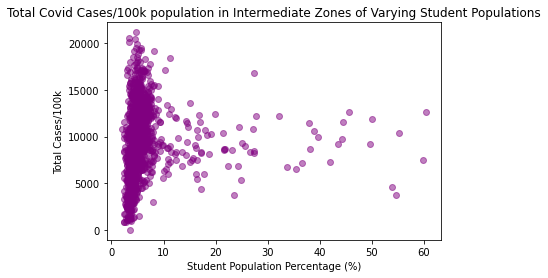

In [10]:
#### Section two - Scatter plot of total cases/100K on one axis and student population on the other axis 
import matplotlib as mpl
import matplotlib.pyplot as plt

#Plotting a scatter graph with Student population percentage on x axis and total cases on the y axis 
#Also setting alpha level for some transparency and setting color to purple 
plt.scatter(merged4["StudentPopPercentage"],merged4["TotalCases/100k"], alpha=0.5,color='purple')

#Labelling x and y axis 
plt.xlabel("Student Population Percentage (%)")
plt.ylabel("Total Cases/100k")

#Inserting a title 
plt.title("Total Covid Cases/100k population in Intermediate Zones of Varying Student Populations")

### Part Two - A scatter plot of total cases/100k on one axis, and student population percantage on the other axis. 

The output depicts a scatter plot of the relationship between Total Covid Cases/100k of population and Student Population Percentage. Although there are some outliers in this data, there does not seem to be any trend or correlation between total number of covid cases and percentage of the Intermediate Zones population who happen to be students. 
Additionally, most datapoints are clustered to the left of the chart, and show wide variation in this area. 

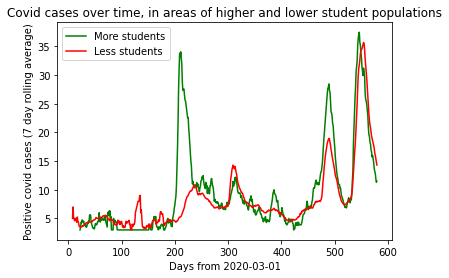

In [11]:
###Section 3 - Graph cases over time separating intermediate zones with students making up 20% or 
###more of the population and zones with less than 20% of the population being students. 

### Separate for more than 20 and less than 20 
#First tidy up data in relevance to this question and remove extra columns
#Using the Positive7Day column in this question so can drop total cases 
merged5 = merged4.drop(["TotalCases","TotalCases/100k"],axis=1)

#Just going back to an earlier dataset to get a column needed for this question
merged7 = merged2.drop(["All people","Area (hectares)","simd1_pop","simd2_pop", "simd3_pop", 
                       "simd4_pop", "simd5_pop","simd1_percent", "simd2_percent", "simd3_percent",
                       "simd4_percent", "simd5_percent","Date","CA", "CAName","Positive7DayQF", 
                       "CrudeRate7DayPositive", "CrudeRate7DayPositiveQF","DT", 
                        "Unnamed: 0_y", "Unnamed: 0_x","studentPop","Population","IntZoneName","simdMostPop"],axis=1)

# Merged this dfs to get all the columns required
merged6 = pd.merge(merged5,merged7,how="inner",on="InterZone")

#Drop rows with empty values 
merged6=merged6.dropna()

#Now subset based on student populations - first by student population percentage 
#that is 20% and above 
more_students = merged6.query("StudentPopPercentage >= 20")

#Then groupby days from 2020-03-01 in order to be able to plot time along x axis
# Grouping by days and getting the mean
# So calculating the mean amount of cases that day across all the datapoints from 
#that day in each InterZone 
#As there a less areas with higher student populations, using the mean allows for 
#clearer comparisions with the next group with the low student population
more_students2 = more_students.groupby("Days from 2020-03-01").agg('mean')

#The days column got set as an idex column, which makes it harder to plot, so want to fix that here
more_students2["Days from 2020-03-01"] = more_students2.index

#Now repeating the above steps for intermediate zones with a student population of less
#than 20%
less_students = merged6.query("StudentPopPercentage <20")
less_students2 = less_students.groupby("Days from 2020-03-01").agg('mean')
less_students2["Days from 2020-03-01"] = less_students2.index

#Now plotting this data as a line graph
plt.plot(more_students2["Days from 2020-03-01"],more_students2["Positive7Day"],color='g')
plt.plot(less_students2["Days from 2020-03-01"],less_students2["Positive7Day"],color='r')

#Labelling x and y axis 
plt.xlabel("Days from 2020-03-01")
plt.ylabel("Positive covid cases (7 day rolling average)")

#Inserting a title 
plt.title("Covid cases over time, in areas of higher and lower student populations")
plt.legend(["More students","Less students"])

### Part Three - Graph cases over time separating intermediate zones with students making up 20% or more of the population and zones with less than 20% of the population being students

The output depicts a line graph wherein the relationship between time and positive covid cases (on a 7 day basis). The green line illustrates this relationship in areas with students making up 20% or more of the population. The red line illustrates this relationship in areas with less than 20% of the population being students. 
Further interpreting this data, both sets seem to follow similar trends and peak at similar times. Although there is one instance where covid cases in more student populated areas peak much more that areas with less students. This could perhaps be when students returned to university settings such as halls after lockdown. 

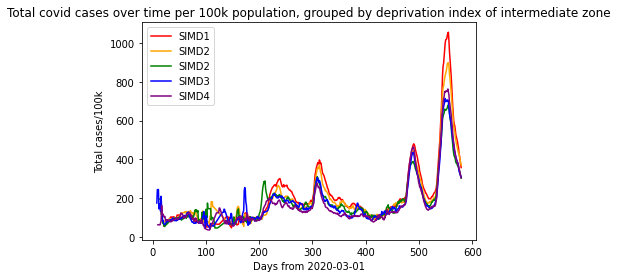

In [22]:
###Section Four  - Graph cases over time with seperate lines for the 5 different SIMD levels.
### Plot by SIMD - total cases over time 
## Method similar to last question
# Subset based on SIMDMostPop
SIMD1 = merged6.query("simdMostPop == 1")
SIMD1
SIMD2 = merged6.query("simdMostPop == 2")
SIMD2
SIMD3 = merged6.query("simdMostPop == 3")
SIMD3
SIMD4 = merged6.query("simdMostPop == 4")
SIMD4
SIMD5 = merged6.query("simdMostPop == 5")

#Then calculate total cases using same method as in the last question
simd1 = SIMD1.groupby("Days from 2020-03-01").agg(sum)
simd1["Days from 2020-03-01"] = simd1.index
#Also add a new column and calculate cases per 100k 
simd1["Cases/100k"]=100000*simd1["Positive7Day"]/simd1["Population"]

#Repeat for each following SIMD
simd2 = SIMD2.groupby("Days from 2020-03-01").agg(sum)
simd2["Days from 2020-03-01"] = simd2.index
simd2["Cases/100k"]=100000*simd2["Positive7Day"]/simd2["Population"]

simd3 = SIMD3.groupby("Days from 2020-03-01").agg(sum)
simd3["Days from 2020-03-01"] = simd3.index
simd3["Cases/100k"]=100000*simd3["Positive7Day"]/simd3["Population"]

simd4 = SIMD4.groupby("Days from 2020-03-01").agg(sum)
simd4["Days from 2020-03-01"] = simd4.index
simd4["Cases/100k"]=100000*simd4["Positive7Day"]/simd4["Population"]

simd5 = SIMD5.groupby("Days from 2020-03-01").agg(sum)
simd5["Days from 2020-03-01"] = simd5.index
simd5["Cases/100k"]=100000*simd5["Positive7Day"]/simd5["Population"]

#Plot a chart with lines for each data set 
plt.plot(simd1["Days from 2020-03-01"],simd1["Cases/100k"],color='red')
plt.plot(simd2["Days from 2020-03-01"],simd2["Cases/100k"],color='orange')
plt.plot(simd3["Days from 2020-03-01"],simd3["Cases/100k"],color='green')
plt.plot(simd4["Days from 2020-03-01"],simd4["Cases/100k"],color='blue')
plt.plot(simd5["Days from 2020-03-01"],simd5["Cases/100k"],color='purple')

#Labelling x and y axis 
plt.xlabel("Days from 2020-03-01")
plt.ylabel("Total cases/100k")

#Inserting a title 
plt.title("Total covid cases over time per 100k population, grouped by deprivation index of intermediate zone")
plt.legend(["SIMD1","SIMD2","SIMD2","SIMD3","SIMD4","SIMD5"])

### Part Four - Graph cases over time with seperate lines for the 5 different SIMD levels

The output charts total covid cases/100k population over time, with separate lines for the 5 different SIMD levels. In general the lines seem to follow similar trends, and tend to peak at the same times. 
However, looking a little more closely, we can see that even though similar trends are being followed, the is a distinct difference between cases in SIMD1 and SIMD4, and suggests that there are more covid cases in more deprived areas. SIMD1, or areas that are most deprived, seem to have experience more covid cases that other areas over time. 